In [1]:
pip install ipympl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.activations import linear, relu, sigmoid
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from autils import plt_act_trio
from lab_utils_relu import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
from autils import *

In [3]:
from google.colab import output
output.enable_custom_widget_manager()

#1. ReLU Activation

새로운 activation funcion Relu에 대해서 알아봅시다.

$$a=max(0,z)$$     


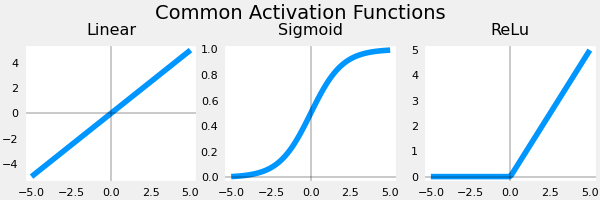

In [4]:
plt_act_trio()

####왜 Non-Linear Activations이 필요한가?

다음 함수는 선형 조각으로 구성됩니다. 기울기는 선형 부분 중에 일정하며 전환점에서 급격하게 변경됩니다. 전환점에서 새 선형 함수가 추가되며, 이 함수가 기존 함수에 추가되면 새 기울기가 생성됩니다. 새로운 함수은 전환 시점에 추가되지만 해당 시점 이전의 출력에는 영향을 주지 않습니다. 비선형 활성화 기능은 전환점 이전과 이후에 입력을 비활성화하는 역할을 합니다.

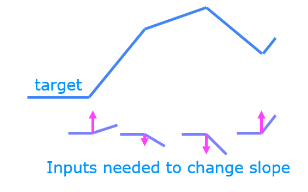

다음 연습에서는 조각별 선형 대상을 모델링해야 하는 회귀 문제에서 아래의 네트워크를 사용합니다:


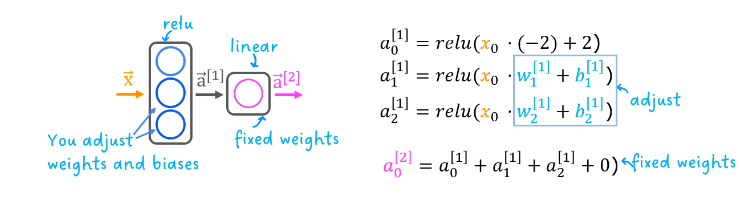

네트워크는 첫 번째 계층에 3개의 유닛이 있습니다. 각각은 대상을 형성하기 위해 필요합니다. Unit 0은 첫 번째 세그먼트를 매핑하기 위해 사전 프로그래밍 및 고정됩니다. Unit 1과 2에서 가중치와 편향을 수정하여 두 번째와 세 번째 세그먼트를 모형화합니다. 출력 단위는 또한 고정되어 있고 첫 번째 계층의 출력을 단순하게 합산합니다.
아래 슬라이더를 사용하여 대상과 일치하도록 가중치와 바이어스를 수정합니다.

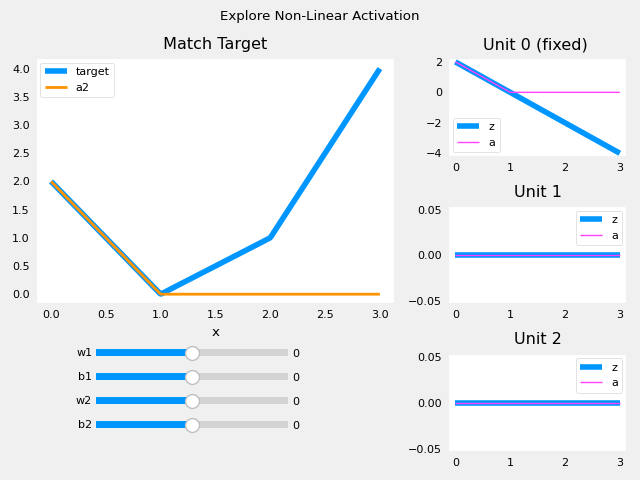

In [5]:
_ = plt_relu_ex()

이 연습의 목표는 ReLU의 비선형 동작이 필요할 때까지 기능을 끄는 데 필요한 기능을 제공하는 방법을 이해하는 것입니다. 이 예에서 이 기능이 어떻게 작동하는지 살펴보겠습니다

ReLU activation의 비활성화 기능을 통해 모델은 선형 세그먼트를 연결하여 복잡한 비선형 함수를 모델링할 수 있습니다

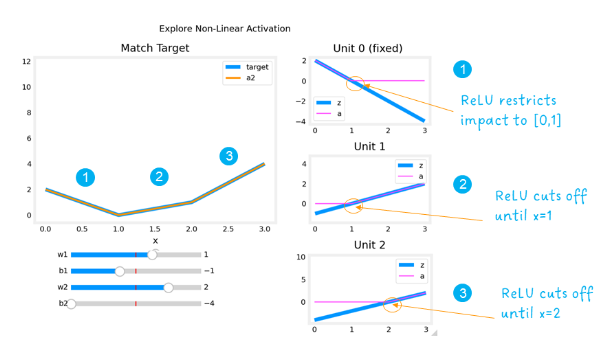

### Quiz1

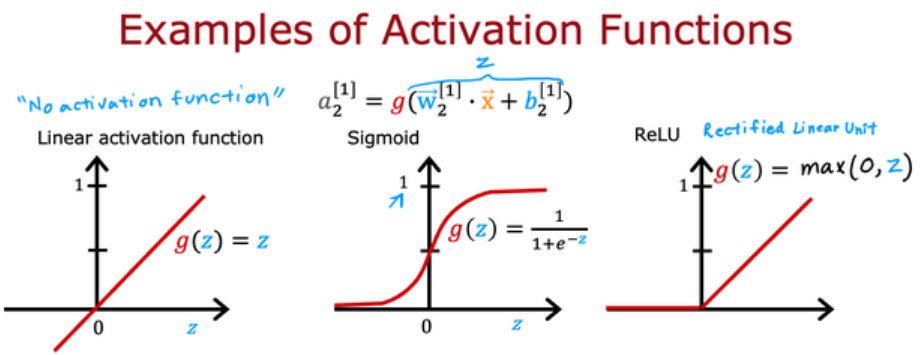

neural network의 hidden layers에서 가장 흔하게 사용하는 activation functions 은 무엇입니까?

1. Linear
2. Most hidden layers do not use any activation function
3. ReLU (rectified linear unit)
4. Sigmoid

###Quiz 2

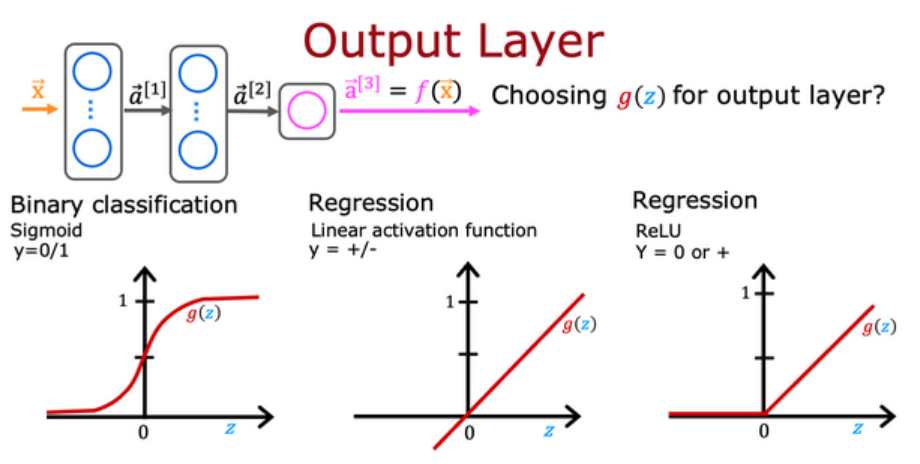

2-1. 주택 가격 예측 task를 진행할 때 output layer에 어떤 activation functions을 사용해야 합니까? 두가지를 고르시오

1. sigmoid
2. ReLU
3. linear

2-2. 다음 문장이 참인지 거짓인지 고르시오.
"많은 레이어가 있지만 activation function이 없는 neural network은 효과적이지 않습니다. 그렇기 때문에 모든 hidden layer에서 linear activation function을 사용해야 합니다"

1.True

2.False



#2. Softmax Function

이 실습에서는 softmax 함수에 대해 알아보겠습니다. 이 함수는 Softmax Regression과 신경망 모두에서 다중 클래스 분류 문제를 해결할 때 사용됩니다.

### Softmax Function

Softmax 출력이 있는 Softmax 회귀 및 신경망 모두에서 N개의 출력이 생성되고 하나의 출력이 예측 범주로 선택됩니다. 두 경우 모두 벡터 z는 소프트맥스 함수에 적용되는 선형 함수에 의해 생성됩니다. softmax 함수는 z를 아래 설명된 대로 확률 분포로 변환합니다. softmax를 적용한 후에는 각 출력이 0과 1 사이가 되고 출력이 1에 추가되므로 확률로 해석할 수 있습니다. 입력이 클수록 출력 확률이 커집니다.

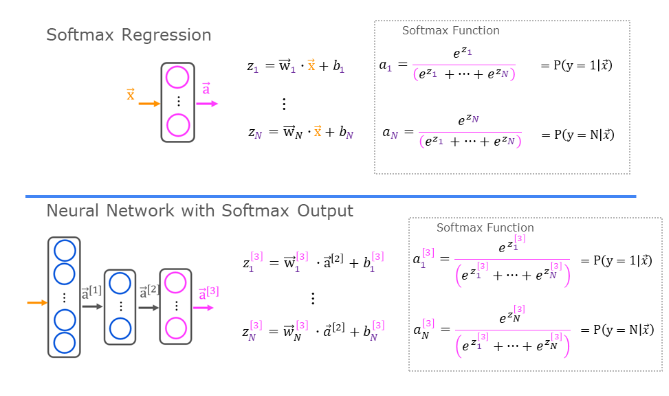

softmax 함수는 다음과 같습니다.

$$a_j=\frac{e^{z_j}}{\sum_{k=1}^{N} e^{z_k}}$$



출력 a가 길이 N의 벡터이면 softmax 회귀 분석의 경우 다음과 같이 쓸 수 있습니다

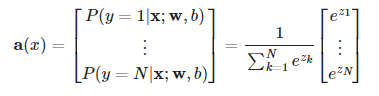

아웃풋은 확률 벡터 입니다.

NumPy 구현을 만들어 보겠습니다:

In [6]:
def my_softmax(z):
    ez = np.exp(z)              #element-wise exponenial
    sm = ez/np.sum(ez)
    return(sm)

아래에서 슬라이더를 사용하여 z 입력 값을 변경해봅니다.


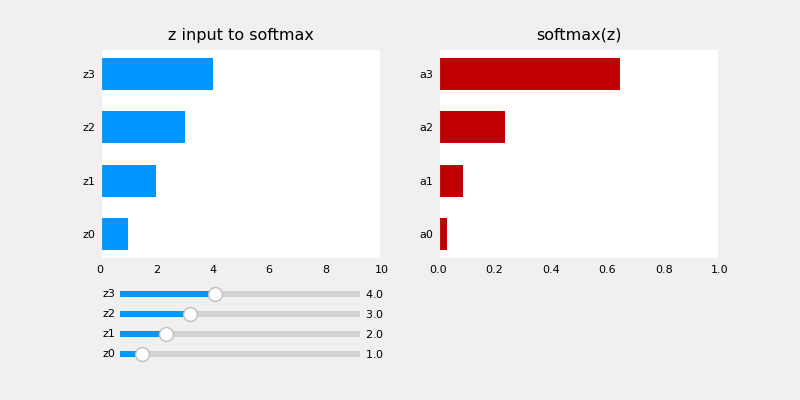

In [7]:
plt.close("all")
plt_softmax(my_softmax)

위의 z 값을 변경할 때 주의해야 할 몇 가지 사항이 있습니다:

* 소프트맥스 분자의 지수는 값의 작은 차이를 확대합니다
* 출력값의 합은 1입니다
* softmax는 모든 출력에 걸쳐 있습니다. 예를 들어 z0을 변경하면 a0-a3의 값이 변경됩니다. 이것을 단일 입력 및 단일 출력을 갖는 ReLU 또는 Sigmoid와 같은 다른 activation과 비교합니다.

###Cost

소프트맥스와 관련된 손실 함수인 교차 엔트로피 손실은 다음과 같습니다:

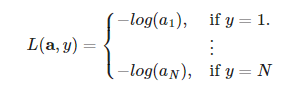

여기서 y는 이 예제의 대상 범주이고 a는 softmax 함수의 출력입니다. 특히, a의 값은 합이 1인 확률입니다.

위의 방정식에서, 대상에 해당하는 값만 손실에 기여하고, 다른 값은 0입니다. cost equation을 작성하려면 index가 target과 일치할 때 1이 되고 그렇지 않으면 0이 되는 indicater function이 필요합니다

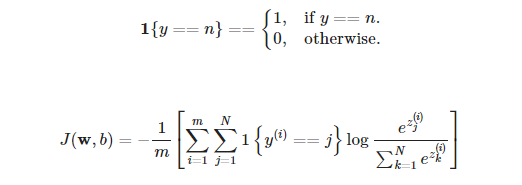

###Tensorflow
이번 lab에서는 텐서플로에서 소프트맥스, 교차 엔트로피 손실을 구현하는 두 가지 방법인 'obvious' 방법과 'preferred' 방법에 대해 논의할 것입니다. 전자는 가장 단순한 반면 후자는 수치적으로 더 안정적입니다.

다중 클래스 분류 모델을 교육하기 위한 데이터 세트를 만드는 것으로 시작하겠습니다.


In [8]:
# make  dataset for example
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

In [9]:
y_train

array([2, 0, 0, ..., 1, 3, 2])

####The Obvious organization

아래 모델은 최종 Dense layer에서 softmax를 activation function으로 하여 구현됩니다. 손실 함수는 컴파일 지시어에 별도로 지정되어 있습니다.

손실 함수는 SparseCategoricalCrossEntropy입니다. 이 손실은 위에 설명되어 있습니다. 이 모델에서 소프트맥스는 마지막 레이어에서 발생합니다. 손실 함수는 확률의 벡터인 소프트맥스 출력을 사용합니다.

In [10]:
model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax')    # < softmax activation here
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train,y_train,
    epochs=10
)

Epoch 1/10
63/63 [==============================] - 2s 2ms/step - loss: 1.2125
Epoch 2/10
63/63 [==============================] - 0s 2ms/step - loss: 0.5307
Epoch 3/10
63/63 [==============================] - 0s 2ms/step - loss: 0.2373
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.1326
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0884
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0695
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0585
Epoch 8/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0516
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0463
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0424


In [11]:
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred[:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

63/63 [==============================] - 0s 1ms/step
[[7.07e-03 8.73e-03 9.60e-01 2.43e-02]
 [9.97e-01 3.12e-03 1.80e-05 1.45e-05]]
largest value 0.99999887 smallest value 1.0994106e-08


####Preferred
preferred에서는 최종 계층이 선형 활성화됩니다. 이 형식의 출력을 로짓이라고 합니다. 손실 함수에는 from_logits = True와 같은 추가 인수가 있습니다. 이를 통해 손실 함수에 소프트맥스 작동이 손실 계산에 포함되어야 함을 알립니다. 이를 통해 구현을 최적화할 수 있습니다.

In [12]:
preferred_model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')   #<-- Note
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),
)

preferred_model.fit(
    X_train,y_train,
    epochs=10
)
        

Epoch 1/10
63/63 [==============================] - 1s 2ms/step - loss: 0.8191
Epoch 2/10
63/63 [==============================] - 0s 2ms/step - loss: 0.2886
Epoch 3/10
63/63 [==============================] - 0s 2ms/step - loss: 0.1426
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0959
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0746
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0624
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0546
Epoch 8/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0491
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0446
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0414


#####Output Handling
preferred model에서 출력은 확률이 아니지만 큰 음수에서 큰 양수까지 다양할 수 있습니다. 확률을 예상하는 예측을 수행할 때는 소프트맥스를 통해 출력을 전송해야 합니다.preferred model 출력을 살펴보겠습니다:


In [13]:
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

63/63 [==============================] - 0s 1ms/step
two example output vectors:
 [[-2.94 -0.63  4.61  0.48]
 [ 3.77 -1.9  -4.19 -5.02]]
largest value 18.842106 smallest value -7.845537


출력 예측은 확률이 아닙니다! 원하는 출력이 확률이면 소프트맥스로 출력을 처리해야 합니다.


In [14]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[5.14e-04 5.19e-03 9.79e-01 1.57e-02]
 [9.96e-01 3.45e-03 3.48e-04 1.51e-04]]
largest value 0.99999803 smallest value 8.424745e-11


가장 가능성이 높은 범주를 선택하기 위해 softmax가 필요하지 않습니다. np.argmax()를 사용하여 가장 큰 출력의 인덱스를 찾을 수 있습니다.


In [15]:
for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-2.94 -0.63  4.61  0.48], category: 2
[ 3.77 -1.9  -4.19 -5.02], category: 0
[ 2.62 -1.16 -3.47 -4.11], category: 0
[-2.7   2.76 -2.67 -3.22], category: 1
[-0.66 -2.65  5.18 -4.05], category: 2


###SparseCategorialCrossentropy or CategoricalCrossEntropy

Tensorflow에는 target values에 대한 두 가지 잠재적인 형식이 있으며 손실의 선택은 어떤 것이 예상되는지를 정의합니다.

* SparseCategorialCrossentropy: 대상이 인덱스에 해당하는 정수여야 합니다. 예를 들어, 잠재적인 목표값이 10개인 경우 y는 0과 9 사이가 됩니다.

* CategoricalCrossEntropy: 대상 인덱스의 값이 1이고 다른 N-1 항목이 0인 원핫 인코딩된 예제의 대상 값을 예상합니다. 10개의 잠재적인 목표 값을 갖는 예제, 여기서 목표값은 [0,0,1,0,0,0,0]입니다.

###Quiz3
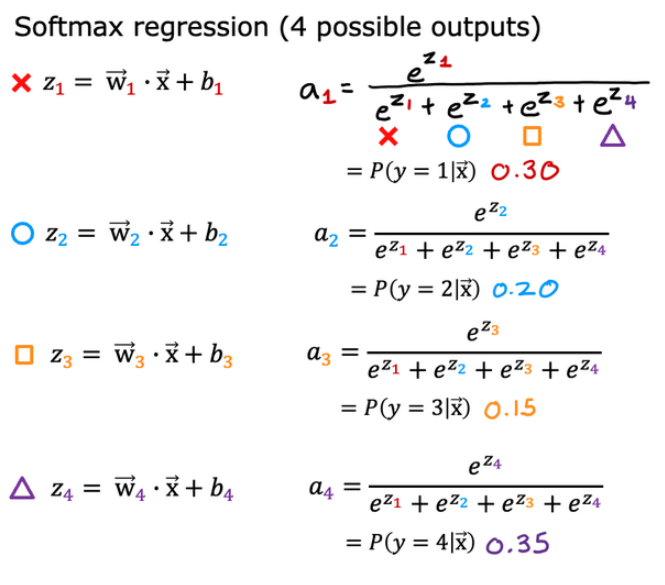

가능한 출력이 4개인 다중 클래스 분류 작업의 경우 softmax activation을 사용한 모든 output의 합이 1이 됩니다. 가능한 출력이 3개인 다중 클래스 분류 작업의 경우 softmax activaion을 사용한 모든 output의 합은 다음과 같아야 합니다...

1. 1보다 큼
2. 1
3. 입력 X에 따라 달라짐.
4. 1보다 작음


###Quiz4


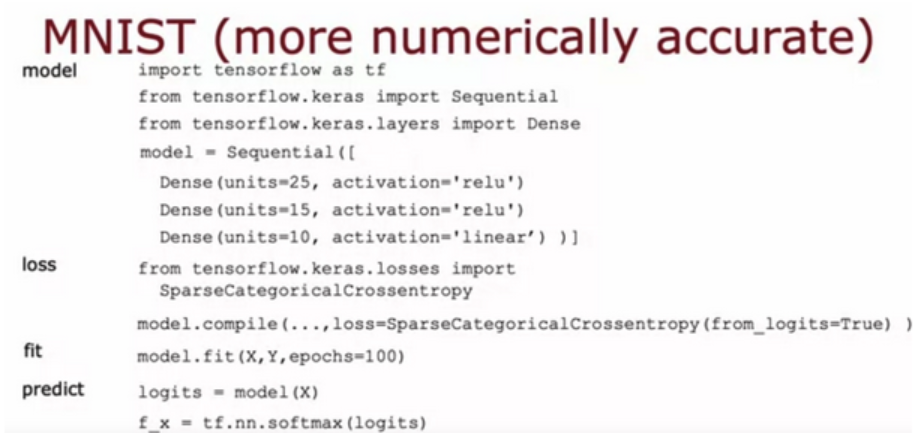



다중 클래스 분류의 경우 소프트맥스 회귀 분석을 구현하는 권장 방법은 손실 함수에서 from_logits=True을 설정하고 다음을 사용하여 모델의 출력 계층을 정의하는 것입니다

1. a 'softmax' activation
2. a "linear" activation

#3 Multi-class Classification


Neural Networks은 종종 데이터를 분류하는 데 사용됩니다. 예를 들어 다음 종류의 Neural Networks이 있습니다:


* 사진을 찍고 사진 속의 피사체를 {개, 고양이, 말, 기타}로 분류합니다

* 문장을 가져와서 그 요소들의 '말의 부분'을 분류합니다: {동사, 동사, 형용사 등..}


이 유형의 네트워크는 final layer에 여러 개의 Units를 가집니다. 각 output은 category와 연결됩니다. 입력 예제를 네트워크에 적용하면 값이 가장 높은 출력이 예측되는 category가 됩니다. 출력이 softmax 함수에 적용되는 경우 softmax의 출력은 입력이 각 category에 포함될 확률을 제공합니다.

이 실습에서는 Tensorflow에서 다중 클래스 네트워크를 구축하는 예를 볼 수 있습니다. 그런 다음 신경망이 어떻게 예측하는지 살펴볼 것입니다.

먼저 4개의 클래스 데이터 세트를 생성합니다.

###3.1 Prepare and visualize our data

Scikit-Learn make_blobs 함수를 사용하여 아래 그림과 같이 4개의 범주로 교육 데이터 세트를 만들 것입니다.


In [16]:
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

각 점은 교육 예제를 나타냅니다. 축(x0,x1)은 입력이며 색상은 예제와 연결된 클래스를 나타냅니다. 훈련을 마치면 모델에 새로운 예제(x0,x1)가 표시되고 클래스를 예측합니다.

이 데이터 세트는 생성되는 동안 많은 실제 분류 문제를 나타냅니다. 여러 input features(x0,...,xn)과 여러 출력 범주가 있습니다. 이 모델은 input features을 사용하여 올바른 출력 범주를 예측하도록 훈련되었습니다.

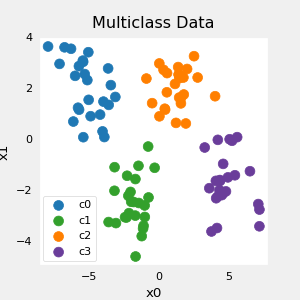

In [17]:
plt_mc(X_train,y_train,classes, centers, std=std)

In [18]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


###3.2 Models

이 실습에서는 그림과 같이 2-layer 네트워크를 사용합니다. 이진 분류 네트워크와는 달리 이 네트워크에는 클래스당 하나씩 총 4개의 출력이 있습니다. 입력 예제에서 값이 가장 높은 출력은 입력의 예측 클래스입니다.


다음은 Tensorflow에서 이 네트워크를 구성하는 방법의 예입니다. 출력 계층은 소프트맥스 활성화가 아닌 선형 활성화를 사용합니다. 소프트맥스를 출력 레이어에 포함할 수 있지만, 훈련 중에 선형 출력이 손실 함수로 전달되는 경우 수치적으로 더 안정적입니다. model을 사용하여 확률을 예측하는 경우 소프트맥스를 해당 지점에 적용할 수 있습니다.

In [19]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        Dense(2, activation = 'relu',   name = "L1"),
        Dense(4, activation = 'linear', name = "L2")
    ]
)

아래의 명령문은 네트워크를 컴파일하고 훈련시킵니다. 


In [20]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X_train,y_train,
    epochs=200
)

Epoch 1/200
4/4 [==============================] - 1s 7ms/step - loss: 1.8787
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 1.6831
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 1.5202
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 1.3943
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 1.3030
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 1.2233
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 1.1678
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 1.1206
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 1.0836
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0487
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0208
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 0.9964
Epoch 13/200
4/4 [==============================] - 0s 4ms/st

훈련된 모델을 통해 모델이 어떻게 훈련 데이터를 분류했는지 확인할 수 있습니다.


184/184 [==============================] - 0s 1ms/step


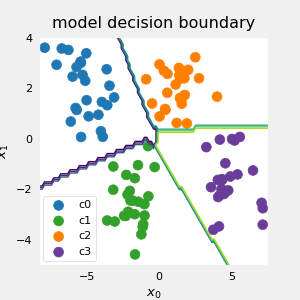

In [21]:
plt_cat_mc(X_train, y_train, model, classes)

위의 결정 경계는 모델이 입력 공간을 분할한 방식을 보여줍니다. 이 매우 간단한 모델은 교육 데이터를 분류하는 데 문제가 없었습니다. 어떻게 이런 일을 해냈을까요? 네트워크를 좀 더 자세히 살펴보겠습니다.

아래에서는 모델에서 훈련된 가중치를 추출하여 각 네트워크 Units의 함수를 plot하는 데 사용할 것입니다. 더 아래에는 결과에 대한 더 자세한 설명이 있습니다. 신경망을 성공적으로 사용하기 위해 이러한 세부 정보를 알 필요는 없지만 계층이 어떻게 결합되어 분류 문제를 해결하는지에 대한 직관을 얻는 데 도움이 될 수 있습니다

In [22]:
# gather the trained parameters from the first layer
l1 = model.get_layer("L1")
W1,b1 = l1.get_weights()

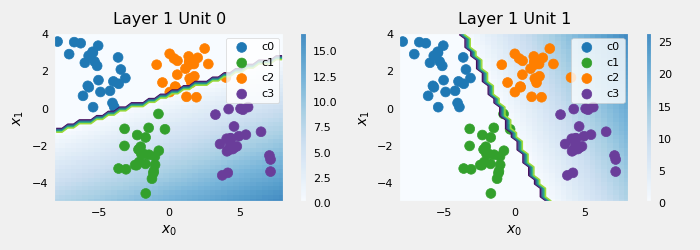

In [23]:
# plot the function of the first layer
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, classes)

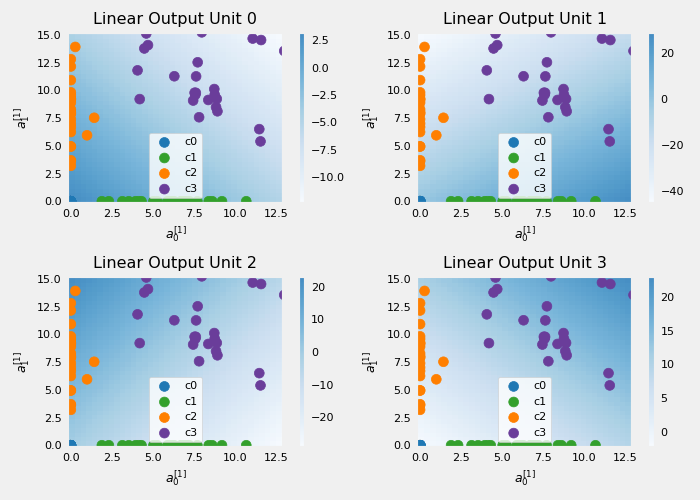

In [24]:
# gather the trained parameters from the output layer
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()
# create the 'new features', the training examples after L1 transformation
Xl2 = np.maximum(0, np.dot(X_train,W1) + b1)

plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2, b2, classes,
                        x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))

### Explanation

**Layer 1**

이러한 그림은 네트워크의 first layer에서 Unit 0과 1의 함수를 보여줍니다. 입력은 축 (x0,x1) 입니다. Unit의 출력은 배경색으로 표시됩니다. 이것은 각 그래프의 오른쪽에 있는 색상 막대로 표시됩니다. 이러한 장치는 ReLu를 사용하므로 출력이 반드시 0과 1 사이에 있는 것은 아니며, 이 경우 피크에서 20보다 큽니다. 이 그래프의 등고선은 출력 사이의 전환점을 나타냅니다

그래프의 등고선은 ReLu의 변곡점입니다.

Unit 0은 클래스 0과 클래스 1을 클래스 2와 클래스 3에서 분리했습니다. 라인의 왼쪽에 있는 점(클래스 0 및 1)은 0을 출력하고 오른쪽에 있는 점은 0보다 큰 값을 출력합니다.
유닛 1은 클래스 0과 클래스 2를 클래스 1과 클래스 3에서 분리했습니다. 라인 위의 점(클래스 0 및 2)은 0을 출력하고 아래의 점은 0보다 큰 값을 출력합니다. 다음 계층에서 이 문제가 어떻게 해결되는지 살펴보겠습니다

**Layer 2, the output layer**

이 그래프의 점은 first layer에 의해 변환된 교육 예제입니다. 한 가지 방법은 first layer가 second layer에 의한 평가를 위한 새로운 feature 집합을 생성했다는 것입니다. 이러한 그래프의 축은 이전 레이어 $a^{[1]}_0$ 및 $a^{[1]}_1$의 출력입니다. 위에서 예측한 대로 클래스 0 및 1(파란색 및 녹색)은 $a^{[1]}_0$=0이고 클래스 0 및 2(파란색 및 주황색)는 $a^{[1]}_1$=0입니다.
다시 한 번 배경색의 강도가 가장 높은 값을 나타냅니다.
Unit 0은 클래스 0(파란색)이 매핑된 (0,0) 근처의 값에 대한 최대값을 생성합니다.
장치 1은 클래스 1(녹색)을 선택하는 왼쪽 상단 모서리에 가장 높은 값을 생성합니다.
2호기는 2등급(주황색)이 거주하는 우측 하단 모서리를 목표로 합니다.
유닛 3은 최종 클래스(보라색)를 선택하여 오른쪽 상단에 가장 높은 값을 생성합니다.

그래프에서 명확하지 않은 또 다른 측면은 값이 Units 간에 조정되었다는 것입니다. Unit이 선택하는 클래스에 대해 최대값을 생성하기에는 충분하지 않으며, 해당 클래스의 포인트에 대해 모든 단위 중 가장 높은 값이어야 합니다. 이 작업은 손실 함수(희소 범주 교차 엔트로피)의 일부인 암시적 소프트맥스 함수에 의해 수행됩니다. 다른 활성화 기능과 달리 소프트맥스는 모든 출력에서 작동합니다.

각 Unit이 무엇을 하는지에 대한 세부 정보를 알지 못한 채 신경망을 성공적으로 사용할 수는 있습니다. 바라건대, 이 예가 neural network에서 무슨 일이 일어나고 있는지에 대한 직관을 제공하기를 바랍니다.


###Quiz 5

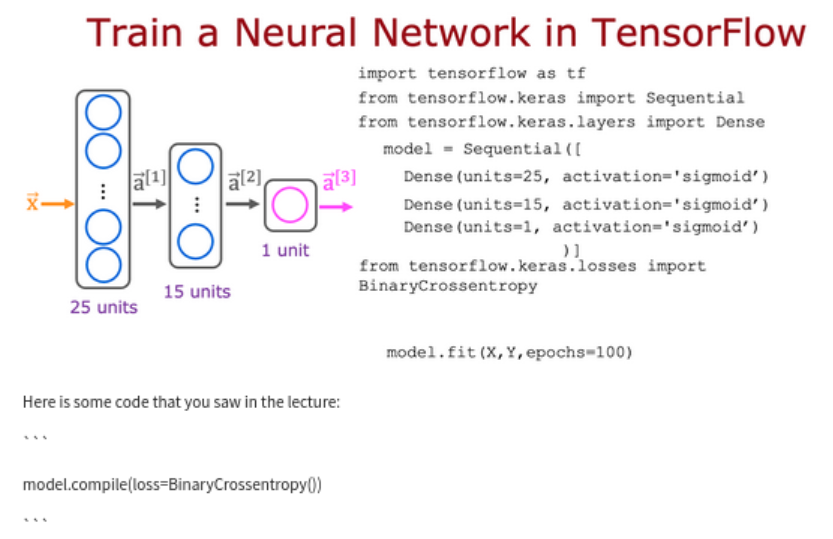

어떤 유형의 task에서 binary cross entropy loss function을 사용합니까?

1. 3개 또는 더 많은 class의 classification task
2. regression task
3. Binary Cross entropy는 어떤 task에도 사용하지 않음
4. Binary classfication 에서 사용

### Quiz 6

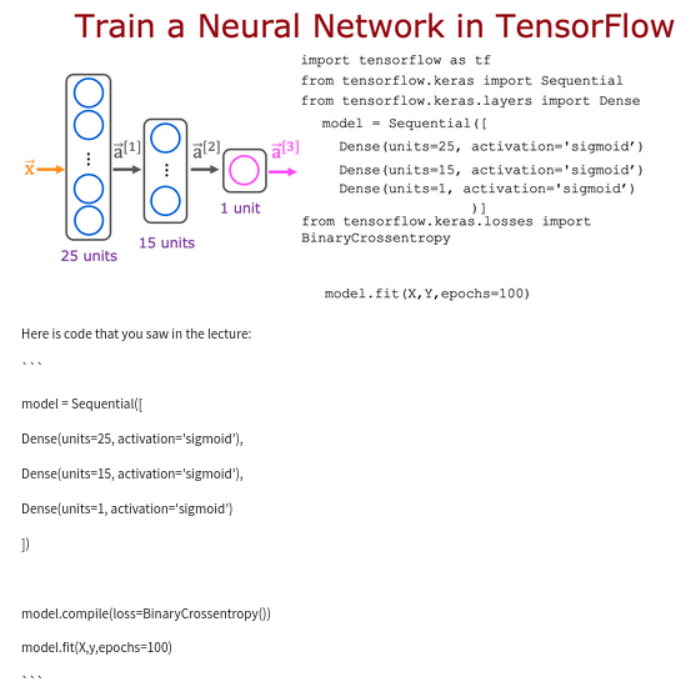

cost를 줄이기 위해 network parameters에서 어떤 코드 라인을 바꿔야 할까요?

1. model.compile(loss=BinaryCrossentropy())
2. model.fit(X,y,epochs=100)
3. 바꿀 부분이 없음
4. model=Sequential([...])